## Time Series Analysis on Sale- Regression Model

# Business understanding 

# Hypothesis
### Null Hypothesis: Promotions have no significant effect on product sales.
### Alternate Hypothesis:  Promotions positively impact product sales, leading to increased sales during promotional periods.


# 5 Analytic Question
 1)	What is the effect of seasonal variations (e.g., Monthly, or quarterly patterns) on total sales?
 2)	What store is the highest performer in terms of sales?
 3)	What are the best-selling products per location?
 4)	Does store size affect total sales?
 5)	Which days have the most sales?




### Python Libraries
### This section is to import all necessary libraries that will be used in the notebook

In [1]:
%pip install pyodbc  
%pip install python-dotenv 
%pip install openpyxl
%pip install --upgrade nbformat
%pip install plotly
%pip install jupyterlab ipywidgets

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip



                                              0.0/77.6 kB ? eta -:--:--
                                              0.0/77.6 kB ? eta -:--:--
                                              0.0/77.6 kB ? eta -:--:--
     ---------------                          30.7/77.6 kB ? eta -:--:--
     ---------------                          30.7/77.6 kB ? eta -:--:--
     ---------------                          30.7/77.6 kB ? eta -:--:--
     ---------------                          30.7/77.6 kB ? eta -:--:--
     ---------------                          30.7/77.6 kB ? eta -:--:--
     ---------------                          30.7/77.6 kB ? eta -:--:--
     ---------------                          30.7/77.6 kB ? eta -:--:--
     ---------------                          30.7/77.6 kB ? eta -:--:--
     ---------------                          30.7/77.6 kB ? eta -:--:--
     ---------------                          30.7/77.6 kB ? eta -:--:--
     ---------------                          30.7/77


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip



                                              0.0/9.2 MB ? eta -:--:--
                                              0.0/9.2 MB ? eta -:--:--
                                              0.0/9.2 MB ? eta -:--:--
                                              0.0/9.2 MB ? eta -:--:--
                                              0.0/9.2 MB ? eta -:--:--
                                              0.0/9.2 MB ? eta -:--:--
                                              0.0/9.2 MB ? eta -:--:--
                                              0.0/9.2 MB ? eta -:--:--
                                              0.0/9.2 MB ? eta -:--:--
                                              0.0/9.2 MB ? eta -:--:--
                                              0.0/9.2 MB ? eta -:--:--
                                              0.0/9.2 MB ? eta -:--:--
                                              0.0/9.2 MB ? eta -:--:--
                                              0.0/9.2 MB ? eta -:--:--
     

#### - Import all the necessary packages

In [2]:
import pyodbc #just installed with pip
from dotenv import dotenv_values #import the dotenv_values function from the dotenv package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import plotly.express as px
import seaborn as sns
import warnings 

warnings.filterwarnings('ignore')

## 3. Data preparation
### 3.1: Data Loading
### This is how the first dataset was retrieved from the SQL Server database. The second and third datasets were downloaded and imported.

In [3]:
environment_variables = dotenv_values('.env')
    
database = environment_variables.get("DATABASE")
server = environment_variables.get("SERVER")
username = environment_variables.get("USERNAME")
password = environment_variables.get("PASSWORD")
    
connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}"
    
connection = pyodbc.connect(connection_string)

# Data for the Project
1. First dataset - the oil,holiday and stores data was extracted from Microsoft SQL Server
2. Second dataset - the train and transaction of the dataset was downloaded from a GitHub repository
3. Third dataset - The test and submission of the data was downloaded from Onedrive

In [4]:
# extract data from Table 1: dbo.oil
# assign it to data_oil
# preview data_oil

query="Select * from dbo.oil" 
data_oil=pd.read_sql(query, connection)

data_oil.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.139999
2,2013-01-03,92.970001
3,2013-01-04,93.120003
4,2013-01-07,93.199997


In [5]:
data_oil.shape

(1218, 2)

In [6]:
data_oil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        1218 non-null   object 
 1   dcoilwtico  1175 non-null   float64
dtypes: float64(1), object(1)
memory usage: 19.2+ KB


In [7]:
data_oil.isnull().sum()

date           0
dcoilwtico    43
dtype: int64

In [8]:
# Save extracted data as data_oil.csv
data_oil['date'] = pd.to_datetime(data_oil['date'])  # Convert 'date' column to datetime if not already
data_oil.to_csv('data_oil.csv', index=False)  # Save the DataFrame to CSV without the index column

In [9]:
# rename column 'dcoilwtico' to oil_price in oil.csv

data_oil.rename(columns={'dcoilwtico':'oil_prices'}, inplace=True)
data_oil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        1218 non-null   datetime64[ns]
 1   oil_prices  1175 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 19.2 KB


### EDA for oil dataset

#### imputing the missing values of oil_prices 

In [10]:
# Interpolate missing values using backward fill 

data_oil['oil_prices'].fillna(method='bfill', inplace=True)

print(data_oil)

           date  oil_prices
0    2013-01-01   93.139999
1    2013-01-02   93.139999
2    2013-01-03   92.970001
3    2013-01-04   93.120003
4    2013-01-07   93.199997
...         ...         ...
1213 2017-08-25   47.650002
1214 2017-08-28   46.400002
1215 2017-08-29   46.459999
1216 2017-08-30   45.959999
1217 2017-08-31   47.259998

[1218 rows x 2 columns]


In [11]:
data_oil.isnull().sum()

date          0
oil_prices    0
dtype: int64

In [12]:
# Extract year, month, and day
data_oil['year'] = data_oil['date'].dt.year
data_oil['month'] = data_oil['date'].dt.month
data_oil['day'] = data_oil['date'].dt.day

# Group by year, month, and day and calculate mean oil price
grouped = data_oil.groupby(['year', 'month', 'day'])['oil_prices'].mean().reset_index()
print(grouped)

      year  month  day  oil_prices
0     2013      1    1   93.139999
1     2013      1    2   93.139999
2     2013      1    3   92.970001
3     2013      1    4   93.120003
4     2013      1    7   93.199997
...    ...    ...  ...         ...
1213  2017      8   25   47.650002
1214  2017      8   28   46.400002
1215  2017      8   29   46.459999
1216  2017      8   30   45.959999
1217  2017      8   31   47.259998

[1218 rows x 4 columns]


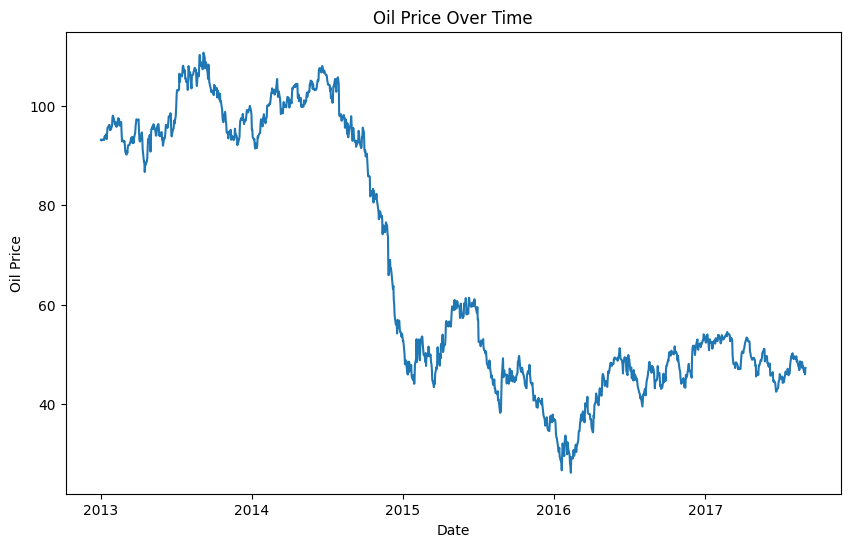

In [13]:
# Assuming your DataFrame is named data_oil
plt.figure(figsize=(10, 6))
plt.plot(data_oil['date'], data_oil['oil_prices'])#marker='o')
plt.title('Oil Price Over Time')
plt.xlabel('Date')
plt.ylabel('Oil Price')
plt.grid(False)
plt.show()

Looking at the plot, you can observe the general movement of the oil prices over the given time period. If the line is consistently moving upward, it indicates an upward trend, meaning that the oil prices have been increasing over time. Conversely, if the line is consistently moving downward, it indicates a downward trend, implying decreasing oil prices.
A steep incline or decline indicates rapid changes in oil prices, while a gentle slope suggests more gradual changes.
In 2013 to 2014 the graph shows the oil_price were increasing over time and the price drop at 2015 drastically. These anomalies could be due to external factors such as geopolitical events, natural disasters, economic shifts, or market dynamics.

In [14]:
# extract data from Table 2: dbo.holidays_events
# assign it to data_oil
# preview data_oil

query2="Select * from dbo.holidays_events" 
data_holiday=pd.read_sql(query2, connection)

data_holiday.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [15]:
data_holiday.shape

(350, 6)

In [16]:
data_holiday.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         350 non-null    object
 1   type         350 non-null    object
 2   locale       350 non-null    object
 3   locale_name  350 non-null    object
 4   description  350 non-null    object
 5   transferred  350 non-null    bool  
dtypes: bool(1), object(5)
memory usage: 14.1+ KB


### checking the unique values of the columns 

In [78]:
unique_locale_name = data_holiday['locale_name'].unique()
print(unique_locale_name)

['Manta' 'Cotopaxi' 'Cuenca' 'Libertad' 'Riobamba' 'Puyo' 'Guaranda'
 'Imbabura' 'Latacunga' 'Machala' 'Santo Domingo' 'El Carmen' 'Cayambe'
 'Esmeraldas' 'Ecuador' 'Ambato' 'Ibarra' 'Quevedo'
 'Santo Domingo de los Tsachilas' 'Santa Elena' 'Quito' 'Loja' 'Salinas'
 'Guayaquil']


In [79]:
unique_locale = data_holiday['locale'].unique()
print(unique_locale)

['Local' 'Regional' 'National']


In [81]:
unique_description = data_holiday['description'].unique()
print(unique_description)

['Fundacion de Manta' 'Provincializacion de Cotopaxi'
 'Fundacion de Cuenca' 'Cantonizacion de Libertad'
 'Cantonizacion de Riobamba' 'Cantonizacion del Puyo'
 'Cantonizacion de Guaranda' 'Provincializacion de Imbabura'
 'Cantonizacion de Latacunga' 'Fundacion de Machala'
 'Fundacion de Santo Domingo' 'Cantonizacion de El Carmen'
 'Cantonizacion de Cayambe' 'Fundacion de Esmeraldas'
 'Primer Grito de Independencia' 'Fundacion de Riobamba'
 'Fundacion de Ambato' 'Fundacion de Ibarra' 'Cantonizacion de Quevedo'
 'Independencia de Guayaquil' 'Traslado Independencia de Guayaquil'
 'Dia de Difuntos' 'Independencia de Cuenca'
 'Provincializacion de Santo Domingo' 'Provincializacion Santa Elena'
 'Independencia de Guaranda' 'Independencia de Latacunga'
 'Independencia de Ambato' 'Fundacion de Quito-1' 'Fundacion de Quito'
 'Fundacion de Loja' 'Navidad-4' 'Cantonizacion de Salinas' 'Navidad-3'
 'Navidad-2' 'Puente Navidad' 'Navidad-1' 'Navidad' 'Navidad+1'
 'Puente Primer dia del ano' 'Primer 

In [17]:
data_holiday.isnull().sum()

date           0
type           0
locale         0
locale_name    0
description    0
transferred    0
dtype: int64

In [18]:
# Save extracted data as data_holiday.csv
data_holiday['date'] = pd.to_datetime(data_holiday['date'])  # Convert 'date' column to datetime if not already
data_holiday.to_csv('data_holiday.csv', index=False)  # Save the DataFrame to CSV without the index column



### EDA for data_holiday

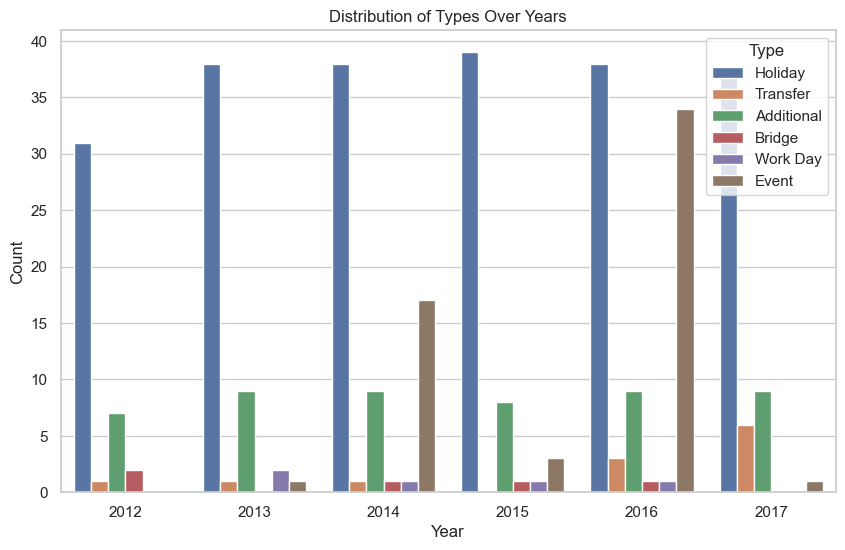

In [19]:
# Extract the year from the 'date' column
data_holiday['year'] = data_holiday['date'].dt.year

# Set the style for the plot
sns.set(style='whitegrid')

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.countplot(data=data_holiday, x='year', hue='type')
plt.title('Distribution of Types Over Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Type')
plt.show()

You might notice trends or patterns in the distribution of holiday types. Certain types of holidays might be more common in some years than in others. In 2015 the graph shows that there were more holidays than the rest of the year and all the holidays was not transferred to the next day. In 2017 most of the holidays was transferred to different days.In 2016 it shows that most event was done in the country.

In [73]:

# Extract the year from the 'date' column
data_holiday['year'] = data_holiday['date'].dt.year
data_holiday['day'] = data_holiday['date'].dt.day
# Create a line graph with a slider
fig = px.line(data_holiday, x='date', y='transferred', color='type',
              title='Transferred Over Time by Type', labels={'date': 'Date', 'transferred': 'Transferred'})
fig.update_layout(xaxis=dict(rangeslider=dict(visible=True)))  # Add slider
fig.show()

From the graph, we can observe how the "transferred" status of different holiday types changes over time. By adjusting the slider, you can focus on specific date ranges and track the fluctuations in the "transferred" status for each holiday type.

In [21]:
# extract data from Table 3: dbo.stores
# assign it to data_stores
# preview data_stores

query3="Select * from dbo.stores" 
data_stores=pd.read_sql(query3, connection)

data_stores.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [22]:
data_stores.shape

(54, 5)

In [23]:
data_stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   store_nbr  54 non-null     int64 
 1   city       54 non-null     object
 2   state      54 non-null     object
 3   type       54 non-null     object
 4   cluster    54 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.2+ KB


In [24]:
data_stores.isnull().sum()

store_nbr    0
city         0
state        0
type         0
cluster      0
dtype: int64

In [25]:
# Save extracted data as data3.csv

data_stores.to_csv('data_stores.csv')

### EDA for data_stores

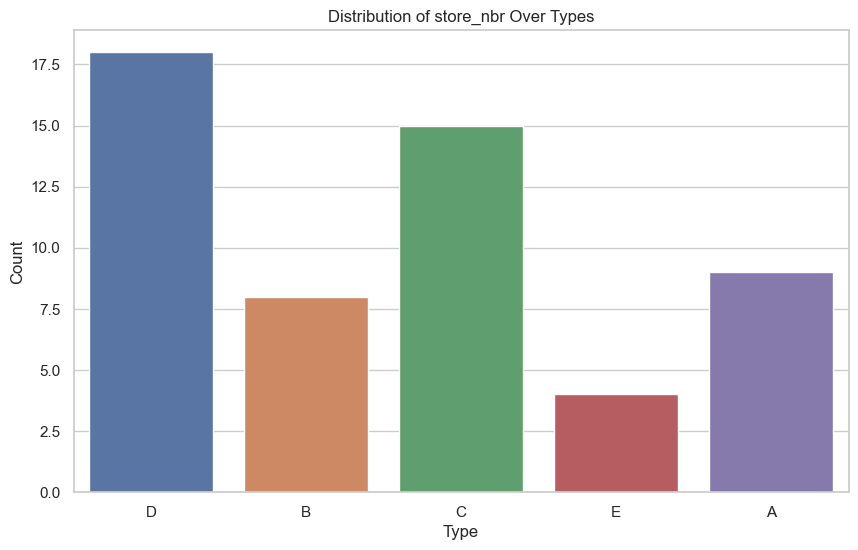

In [89]:
#distribution of store_nbr over types
# Set the style for the plot
sns.set(style='whitegrid')

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.countplot(data=data_stores, x='type')
plt.title('Distribution of store_nbr Over Types')
plt.xlabel('Type')
plt.ylabel('Count')
plt.xticks(rotation=360)
plt.show()

The bar plot displays the distribution of store_nbr over different types of stores. Each bar on the plot represents a specific type of store, and the height of the bar indicates the count of stores belonging to that type. 

From the plot, you can observe which type of store (A, B, or C) is the most common among the given store numbers. D has the highest frequency followed by C and A type.

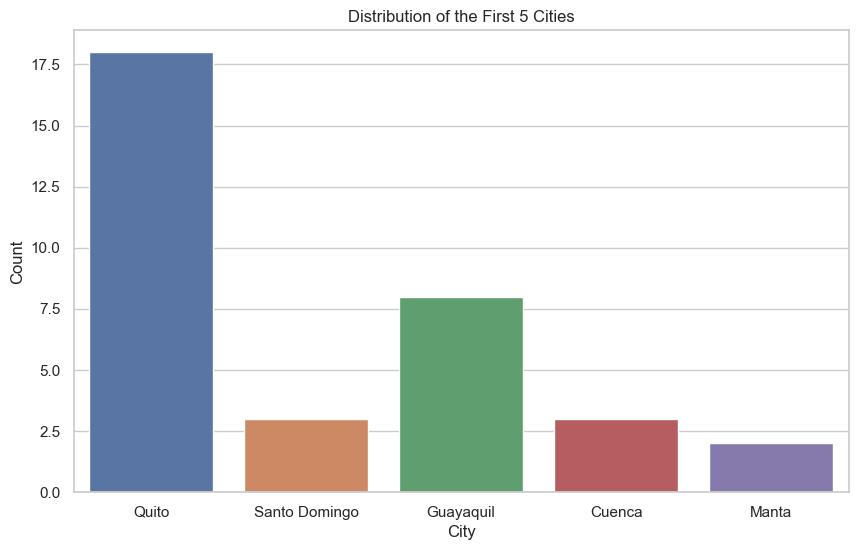

In [96]:
#Distribution of cities and Clusters
# Set the style for the plot
sns.set(style='whitegrid')
# Filter the data for the first 5 cities
first_5_cities = data_stores['city'].value_counts().head(5).index
data_first_5_cities = data_stores[data_stores['city'].isin(first_5_cities)]

# Create a bar plot for the distribution of the first 5 cities
plt.figure(figsize=(10, 6))
sns.countplot(data=data_first_5_cities, x='city')
plt.title('Distribution of the First 5 Cities')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=360)
plt.show()



The first bar plot displays the distribution of stores across different cities. Each bar on the plot represents a specific city, and the height of the bar indicates the count of stores located in that city.  The plot gives an overview of the geographical distribution of the stores.

The second bar plot shows the distribution of stores across different clusters. Each bar corresponds to a cluster, and the height of the bar represents the count of stores belonging to that cluster.  The plot provides insights into how the stores are grouped into different clusters, which might reflect certain patterns or characteristics shared among them

### Analystic Question 4 

In [94]:
# Group the data by cluster and calculate total sales for each cluster
sales_by_cluster = data_stores.groupby('cluster')['store_nbr'].count()

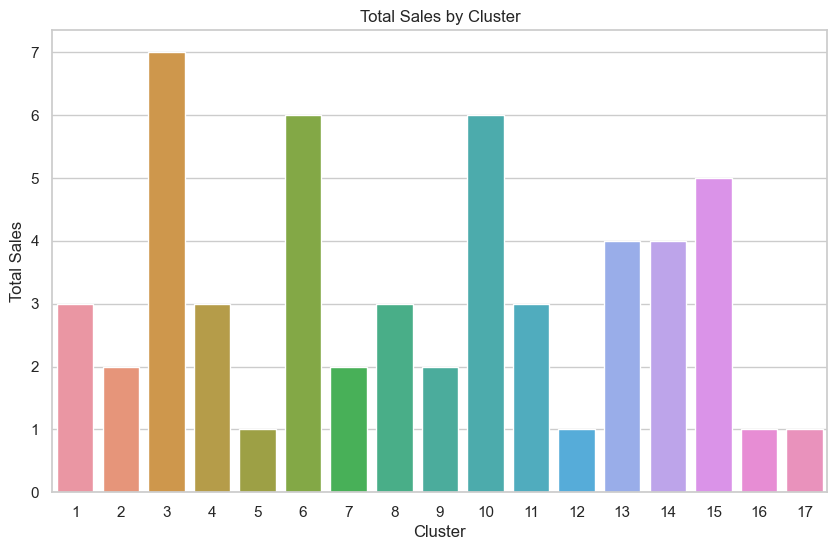

In [95]:
# Create a bar plot for sales by cluster
plt.figure(figsize=(10, 6))
sns.barplot(x=sales_by_cluster.index, y=sales_by_cluster.values)
plt.title('Total Sales by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)
plt.show()


The  plot shows the Total Sales across different clusters. Each bar corresponds to a cluster, and the height of the bar represents theTotal Sales belonging to that cluster.  The plot provides insights into how theTotal sales are grouped into different clusters, which might reflect certain patterns or characteristics shared among them

In [26]:
data_sub = pd.read_excel('E:/LP3 dataset/sample_submission.xlsx')

In [27]:
data_sub.head(5)

,id,sales
0,3000888,0
1,3000889,0
2,3000890,0
3,3000891,0
4,3000892,0


In [28]:
data_trans = pd.read_csv('E:/LP3 dataset/transactions.csv', parse_dates=['date'])

In [29]:
data_trans.head(5)

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [30]:
data_trans.shape

(83488, 3)

In [31]:
data_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          83488 non-null  datetime64[ns]
 1   store_nbr     83488 non-null  int64         
 2   transactions  83488 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 1.9 MB


In [32]:
data_trans.isnull().sum()

date            0
store_nbr       0
transactions    0
dtype: int64

### EDA on transactions 

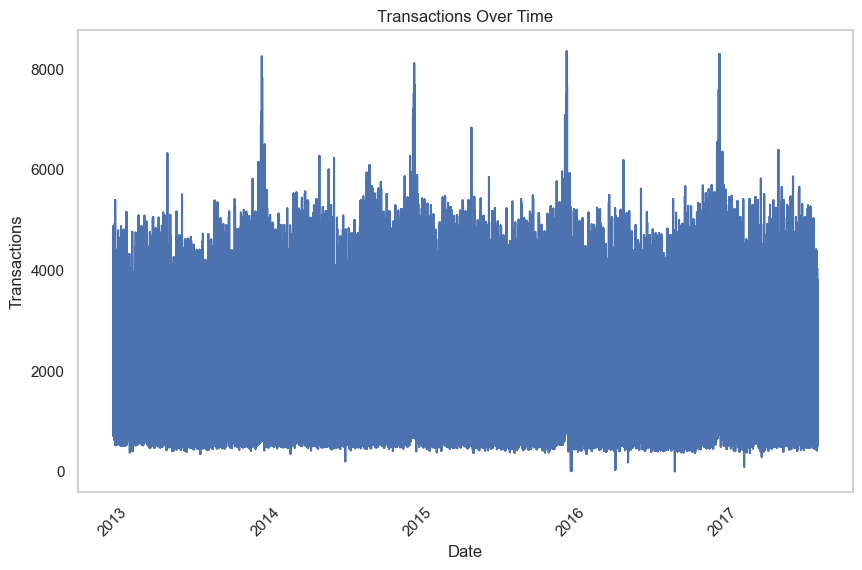

In [100]:
# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(data_trans['date'], data_trans['transactions'], linestyle='-', color='b')
plt.title('Transactions Over Time')
plt.xlabel('Date')
plt.ylabel('Transactions')
plt.xticks(rotation=45)
plt.grid(False)
plt.show()

The graph  depicts the trend of transactions for a given period. The x-axis represents the timeline, progressing from earlier dates on the left to later dates on the right. The y-axis represents the number of transactions recorded for each corresponding date. There is fluctuation in the transaction counts over time, with some periods experiencing higher transaction activity than others.
The plot shows both upward and downward trends in transaction counts, suggesting varying customer engagement or external factors impacting sales.


In [33]:
data_test= pd.read_excel('E:/LP3 dataset/test.xlsx', parse_dates=['date'])

In [34]:
data_test.head(5)

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0


In [35]:
data_test.shape

(28512, 5)

In [36]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           28512 non-null  int64         
 1   date         28512 non-null  datetime64[ns]
 2   store_nbr    28512 non-null  int64         
 3   family       28512 non-null  object        
 4   onpromotion  28512 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 1.1+ MB


In [37]:
data_test.isnull().sum()

id             0
date           0
store_nbr      0
family         0
onpromotion    0
dtype: int64

In [38]:
data_train= pd.read_csv('E:/LP3 dataset/train.csv', parse_dates=['date'])

In [39]:
data_train.head(5)

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [40]:
data_train.shape

(3000888, 6)

In [41]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype         
---  ------       -----         
 0   id           int64         
 1   date         datetime64[ns]
 2   store_nbr    int64         
 3   family       object        
 4   sales        float64       
 5   onpromotion  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 137.4+ MB


In [42]:
data_train.isnull().sum()

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

### EDA of train data

#### Which dates have the lowest and highest sales for each year?

In [101]:

# Extract the year from the 'date' column
data_train['year'] = data_train['date'].dt.year

# Group the data by year and date, and calculate total sales
grouped_sales = data_train.groupby(['year', 'date'])['sales'].sum().reset_index()

# Find dates with lowest and highest sales for each year
lowest_sales_dates = grouped_sales.groupby('year')['date'].min()
highest_sales_dates = grouped_sales.groupby('year')['date'].max()

# Print the results
for year, lowest_date, highest_date in zip(lowest_sales_dates.index, lowest_sales_dates, highest_sales_dates):
    print(f"Year: {year}, Lowest Sales Date: {lowest_date}, Highest Sales Date: {highest_date}")

Year: 2013, Lowest Sales Date: 2013-01-01 00:00:00, Highest Sales Date: 2013-12-31 00:00:00
Year: 2014, Lowest Sales Date: 2014-01-01 00:00:00, Highest Sales Date: 2014-12-31 00:00:00
Year: 2015, Lowest Sales Date: 2015-01-01 00:00:00, Highest Sales Date: 2015-12-31 00:00:00
Year: 2016, Lowest Sales Date: 2016-01-01 00:00:00, Highest Sales Date: 2016-12-31 00:00:00
Year: 2017, Lowest Sales Date: 2017-01-01 00:00:00, Highest Sales Date: 2017-08-15 00:00:00


In [103]:
result_df = pd.DataFrame({
    'Year': lowest_sales_dates.index,
    'Lowest Sales Date': lowest_sales_dates,
    'Highest Sales Date': highest_sales_dates
})

# Print the DataFrame
print(result_df)

      Year Lowest Sales Date Highest Sales Date
year                                           
2013  2013        2013-01-01         2013-12-31
2014  2014        2014-01-01         2014-12-31
2015  2015        2015-01-01         2015-12-31
2016  2016        2016-01-01         2016-12-31
2017  2017        2017-01-01         2017-08-15


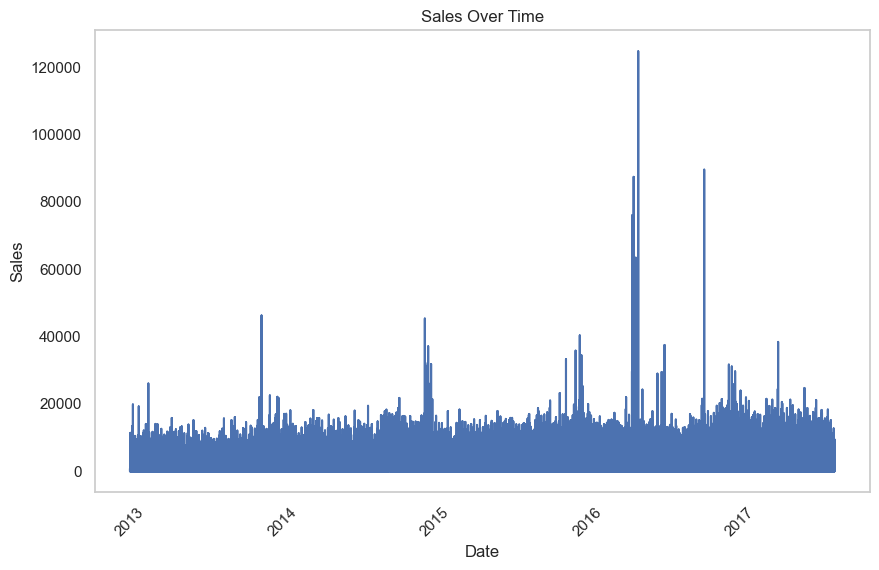

In [106]:
# Assuming your DataFrame is named 'data_train'
plt.figure(figsize=(10, 6))
plt.plot(data_train['date'], data_train['sales'], linestyle='-', color='b')
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.grid(False)
plt.show()

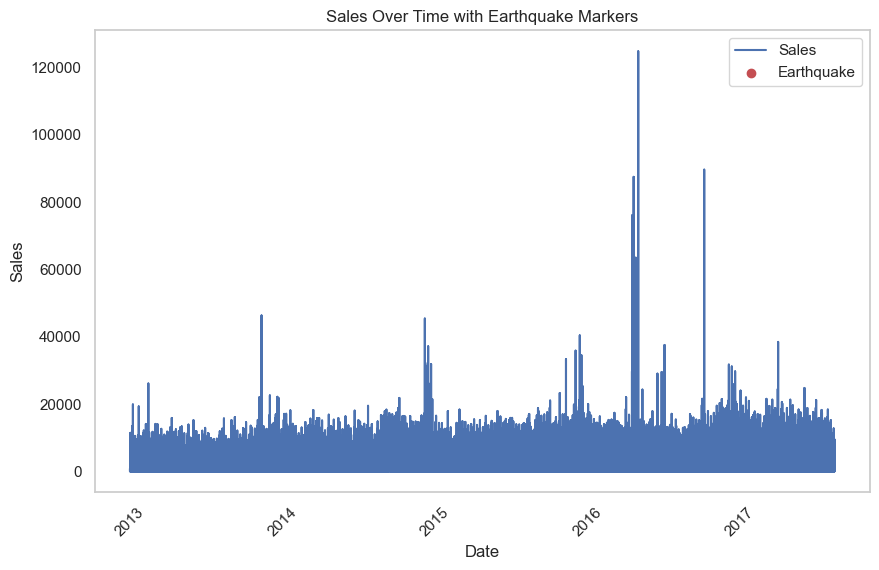

In [122]:
plt.figure(figsize=(10, 6))
plt.plot(data_train['date'], data_train['sales'], linestyle='-', color='b', label='Sales')
plt.scatter(data_train[data_train['is_earthquake']]['date'], data_train[data_train['is_earthquake']]['sales'],
            color='r', marker='o', label='Earthquake')

plt.title('Sales Over Time with Earthquake Markers')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.legend()

plt.grid(False)
plt.show()

### Did the earthquake impact sales?



In [113]:


# Create a new column 'is_earthquake' in the 'data_train' DataFrame
data_train['is_earthquake'] = data_train['date'].isin(data_train)

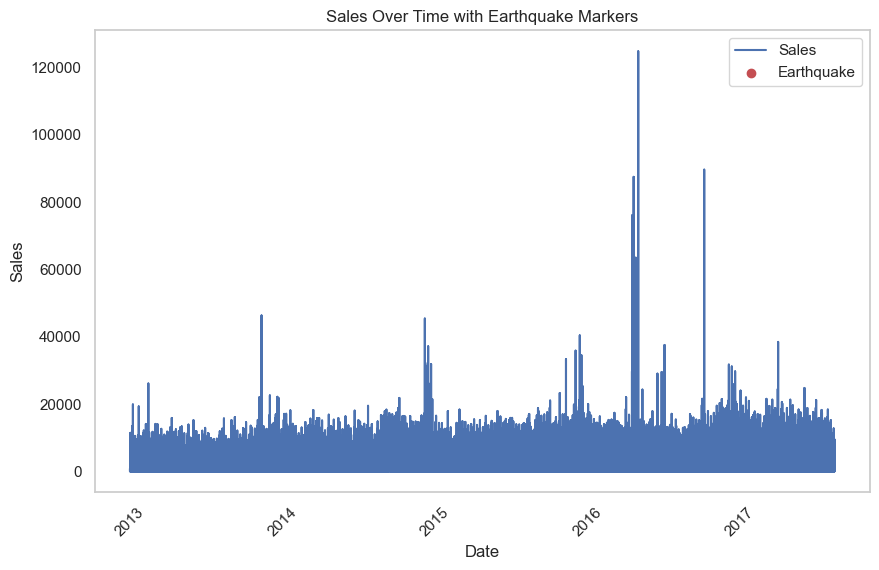

In [114]:
# Create a line graph with markers for earthquake dates
plt.figure(figsize=(10, 6))
plt.plot(data_train['date'], data_train['sales'], linestyle='-', color='b', label='Sales')
plt.scatter(data_train[data_train['is_earthquake']]['date'], data_train[data_train['is_earthquake']]['sales'],
            color='r', marker='o', label='Earthquake')

# Add labels and title
plt.title('Sales Over Time with Earthquake Markers')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.legend()

plt.grid(False)
plt.show()

### Checking the range of date 

In [43]:
# cheacking the range of date on data_oil
data_oil['date'].min(),data_oil['date'].max()

(Timestamp('2013-01-01 00:00:00'), Timestamp('2017-08-31 00:00:00'))

In [44]:
# cheacking the range of date on holiday
data_holiday['date'].min(),data_holiday['date'].max()

(Timestamp('2012-03-02 00:00:00'), Timestamp('2017-12-26 00:00:00'))

In [45]:
# cheacking the range of date on transaction 
data_trans['date'].min(),data_trans['date'].max()

(Timestamp('2013-01-01 00:00:00'), Timestamp('2017-08-15 00:00:00'))

In [46]:
# cheacking the range of date on train  
data_train['date'].min(),data_train['date'].max()

(Timestamp('2013-01-01 00:00:00'), Timestamp('2017-08-15 00:00:00'))

In [47]:
# cheacking the range of date on test 
data_test['date'].min(),data_test['date'].max()

(Timestamp('2017-08-16 00:00:00'), Timestamp('2017-08-31 00:00:00'))

### splitting the data_oil date 

In [48]:
# split oil.csv on the dates that reflects the split for the test and train
#define the start and end dates for the oil.csv that will be joined to the test

data_oil_test_start_date= '2017-08-16'
data_oil_test_end_date= '2017-08-31'

data_oil_train = data_oil[data_oil['date'] < data_oil_test_start_date]
data_oil_test = data_oil[data_oil['date'].between (data_oil_test_start_date, data_oil_test_end_date)]

# Verify the split
range_oil_test = data_oil_test['date'].min(), data_oil_test['date'].max()
range_oil_train = data_oil_train['date'].min(), data_oil_train['date'].max()

print(range_oil_test)
print(range_oil_train)


(Timestamp('2017-08-16 00:00:00'), Timestamp('2017-08-31 00:00:00'))
(Timestamp('2013-01-01 00:00:00'), Timestamp('2017-08-15 00:00:00'))


### Merging the dataset 

In [49]:
# merge test and oil_test on 'date'

merged_test = pd.merge( data_test, data_oil_test, on='date', how='left')
print(merged_test.head())

        id       date  store_nbr      family  onpromotion  oil_prices    year  \
0  3000888 2017-08-16          1  AUTOMOTIVE            0   46.799999  2017.0   
1  3000889 2017-08-16          1   BABY CARE            0   46.799999  2017.0   
2  3000890 2017-08-16          1      BEAUTY            2   46.799999  2017.0   
3  3000891 2017-08-16          1   BEVERAGES           20   46.799999  2017.0   
4  3000892 2017-08-16          1       BOOKS            0   46.799999  2017.0   

   month   day  
0    8.0  16.0  
1    8.0  16.0  
2    8.0  16.0  
3    8.0  16.0  
4    8.0  16.0  


In [50]:
#check for null or missing values

merged_test.isnull().sum()

id                0
date              0
store_nbr         0
family            0
onpromotion       0
oil_prices     7128
year           7128
month          7128
day            7128
dtype: int64

In [51]:
merged_test.shape

(28512, 9)

In [52]:
# merge train and data_oil_train_interpolated datasets
# print merged dataset to see if successfull

merged_train = pd.merge(data_train, data_oil_train, on='date', how='left')
print(merged_train.head())

   id       date  store_nbr      family  sales  onpromotion  oil_prices  \
0   0 2013-01-01          1  AUTOMOTIVE    0.0            0   93.139999   
1   1 2013-01-01          1   BABY CARE    0.0            0   93.139999   
2   2 2013-01-01          1      BEAUTY    0.0            0   93.139999   
3   3 2013-01-01          1   BEVERAGES    0.0            0   93.139999   
4   4 2013-01-01          1       BOOKS    0.0            0   93.139999   

     year  month  day  
0  2013.0    1.0  1.0  
1  2013.0    1.0  1.0  
2  2013.0    1.0  1.0  
3  2013.0    1.0  1.0  
4  2013.0    1.0  1.0  


In [53]:
merged_train.isnull().sum()

id                  0
date                0
store_nbr           0
family              0
sales               0
onpromotion         0
oil_prices     857142
year           857142
month          857142
day            857142
dtype: int64

In [54]:
merged_train.shape

(3000888, 10)

In [55]:
# join transactions and stores on 'store_nbr'
transactions_store = pd.merge(data_trans, data_stores, on='store_nbr', how='left')
print(transactions_store.head())


        date  store_nbr  transactions     city        state type  cluster
0 2013-01-01         25           770  Salinas  Santa Elena    D        1
1 2013-01-02          1          2111    Quito    Pichincha    D       13
2 2013-01-02          2          2358    Quito    Pichincha    D       13
3 2013-01-02          3          3487    Quito    Pichincha    D        8
4 2013-01-02          4          1922    Quito    Pichincha    D        9


In [56]:
#checking the null value of the transactions_store
transactions_store.isnull().sum()

date            0
store_nbr       0
transactions    0
city            0
state           0
type            0
cluster         0
dtype: int64

In [57]:
# cheacking the range of date on the  transaction_store 
transactions_store['date'].min(),transactions_store['date'].max()

(Timestamp('2013-01-01 00:00:00'), Timestamp('2017-08-15 00:00:00'))

splitting the transaction_store date

In [58]:
#splitting the transactions_store date
# Define start and end dates for train and test sets
transactions_store_start_date = pd.Timestamp('2013-01-01')
transactions_store_end_date = pd.Timestamp('2017-08-15')

# Filter the DataFrame to get training and testing data
transactions_store_train = transactions_store[
    (transactions_store['date'] >= transactions_store_start_date) &
    (transactions_store['date'] <= transactions_store_end_date)
]

transactions_store_test = transactions_store[
    transactions_store['date'] > transactions_store_end_date
]

# Verify the split
transactions_store_train_min_date = transactions_store_train['date'].min()
transactions_store_train_max_date = transactions_store_train['date'].max()
transactions_store_test_min_date = transactions_store_test['date'].min()
transactions_store_test_max_date = transactions_store_test['date'].max()

print("Train Set Date Range:", transactions_store_train_min_date, "to", transactions_store_train_max_date)
print("Test Set Date Range:", transactions_store_test_min_date, "to", transactions_store_test_max_date)

Train Set Date Range: 2013-01-01 00:00:00 to 2017-08-15 00:00:00
Test Set Date Range: NaT to NaT


In pandas, NaT stands for "Not a Timestamp" and represents missing or undefined values in datetime-related data. Since the transactions_store dataset has the same timestamp as the train we decided to maintain the timestamp for the train and use NaT for the test data

Merging the transactions_store to the train and test data 

In [59]:
# merge test and transactions_store on 'date' on the test data

test_tran= pd.merge( merged_test, transactions_store_test, on=['date', 'store_nbr'], how='left')
print(test_tran.head())

        id       date  store_nbr      family  onpromotion  oil_prices    year  \
0  3000888 2017-08-16          1  AUTOMOTIVE            0   46.799999  2017.0   
1  3000889 2017-08-16          1   BABY CARE            0   46.799999  2017.0   
2  3000890 2017-08-16          1      BEAUTY            2   46.799999  2017.0   
3  3000891 2017-08-16          1   BEVERAGES           20   46.799999  2017.0   
4  3000892 2017-08-16          1       BOOKS            0   46.799999  2017.0   

   month   day  transactions city state type  cluster  
0    8.0  16.0           NaN  NaN   NaN  NaN      NaN  
1    8.0  16.0           NaN  NaN   NaN  NaN      NaN  
2    8.0  16.0           NaN  NaN   NaN  NaN      NaN  
3    8.0  16.0           NaN  NaN   NaN  NaN      NaN  
4    8.0  16.0           NaN  NaN   NaN  NaN      NaN  


In [60]:
test_tran.isnull().sum()

id                  0
date                0
store_nbr           0
family              0
onpromotion         0
oil_prices       7128
year             7128
month            7128
day              7128
transactions    28512
city            28512
state           28512
type            28512
cluster         28512
dtype: int64

In [61]:
test_tran.shape

(28512, 14)

In [62]:
# merge test and transactions_store on 'date' on the train data

train_tran= pd.merge( merged_train, transactions_store_train, on=['date','store_nbr'], how='left')
print(train_tran.head())

   id       date  store_nbr      family  sales  onpromotion  oil_prices  \
0   0 2013-01-01          1  AUTOMOTIVE    0.0            0   93.139999   
1   1 2013-01-01          1   BABY CARE    0.0            0   93.139999   
2   2 2013-01-01          1      BEAUTY    0.0            0   93.139999   
3   3 2013-01-01          1   BEVERAGES    0.0            0   93.139999   
4   4 2013-01-01          1       BOOKS    0.0            0   93.139999   

     year  month  day  transactions city state type  cluster  
0  2013.0    1.0  1.0           NaN  NaN   NaN  NaN      NaN  
1  2013.0    1.0  1.0           NaN  NaN   NaN  NaN      NaN  
2  2013.0    1.0  1.0           NaN  NaN   NaN  NaN      NaN  
3  2013.0    1.0  1.0           NaN  NaN   NaN  NaN      NaN  
4  2013.0    1.0  1.0           NaN  NaN   NaN  NaN      NaN  


In [63]:
train_tran.isnull().sum()

id                   0
date                 0
store_nbr            0
family               0
sales                0
onpromotion          0
oil_prices      857142
year            857142
month           857142
day             857142
transactions    245784
city            245784
state           245784
type            245784
cluster         245784
dtype: int64

In [64]:
train_tran.shape

(3000888, 15)

In [65]:
train_tran.head(2)

,id,date,store_nbr,family,sales,onpromotion,oil_prices,year,month,day,transactions,city,state,type,cluster
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,93.139999,2013.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN
1,1,2013-01-01,1,BABY CARE,0.0,0,93.139999,2013.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN


In [66]:
# cheacking the range of date on the  train_tran
train_tran['date'].min(),train_tran['date'].max()

(Timestamp('2013-01-01 00:00:00'), Timestamp('2017-08-15 00:00:00'))

In [67]:
# cheacking the range of date on the test_tran 
test_tran['date'].min(),test_tran['date'].max()

(Timestamp('2017-08-16 00:00:00'), Timestamp('2017-08-31 00:00:00'))

dropping some of the column at the holiday data 

In [68]:
# Drop columns 'locale' and 'locale_name'
holiday = data_holiday.drop(['locale', 'locale_name', 'description'], axis=1)

# Display the updated DataFrame
print(holiday.head())

        date     type  transferred  year
0 2012-03-02  Holiday        False  2012
1 2012-04-01  Holiday        False  2012
2 2012-04-12  Holiday        False  2012
3 2012-04-14  Holiday        False  2012
4 2012-04-21  Holiday        False  2012


In [ ]:
# cheacking the range of date on the test_tran 
holiday['date'].min(),holiday['date'].max()

(Timestamp('2012-03-02 00:00:00'), Timestamp('2017-12-26 00:00:00'))

In [ ]:
# Filter holiday data for the train and test periods
train_holiday = holiday[(holiday['date'] >= '2013-01-01') & (holiday['date'] <= '2017-08-15')]
test_holiday = holiday[(holiday['date'] >= '2017-08-16') & (holiday['date'] <= '2017-08-31')]

# Now we can merge the train and test holiday data with the respective train and test datasets
train = train_tran.merge(train_holiday, on=['date','type'], how='left')
test = test_tran.merge(test_holiday, on=['date','type'], how='left')

In [ ]:
# cheacking the range of date on the train
train['date'].min(),train['date'].max()

(Timestamp('2013-01-01 00:00:00'), Timestamp('2017-08-15 00:00:00'))

In [ ]:
train.head(2)

,id,date,store_nbr,family,sales,onpromotion,oil_prices,transactions,city,state,type,cluster,transferred
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2013-01-01,1,BABY CARE,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 13 columns):
 #   Column        Dtype         
---  ------        -----         
 0   id            int64         
 1   date          datetime64[ns]
 2   store_nbr     int64         
 3   family        object        
 4   sales         float64       
 5   onpromotion   int64         
 6   oil_prices    float64       
 7   transactions  float64       
 8   city          object        
 9   state         object        
 10  type          object        
 11  cluster       float64       
 12  transferred   object        
dtypes: datetime64[ns](1), float64(4), int64(3), object(5)
memory usage: 297.6+ MB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            28512 non-null  int64         
 1   date          28512 non-null  datetime64[ns]
 2   store_nbr     28512 non-null  int64         
 3   family        28512 non-null  object        
 4   onpromotion   28512 non-null  int64         
 5   oil_prices    21384 non-null  float64       
 6   transactions  0 non-null      float64       
 7   city          0 non-null      object        
 8   state         0 non-null      object        
 9   type          0 non-null      object        
 10  cluster       0 non-null      float64       
 11  transferred   0 non-null      object        
dtypes: datetime64[ns](1), float64(3), int64(3), object(5)
memory usage: 2.6+ MB


## imputing the missing values in the train and test data 

In [ ]:
train.isnull().sum()

id                    0
date                  0
store_nbr             0
family                0
sales                 0
onpromotion           0
oil_prices       928422
transactions     245784
city             245784
state            245784
type             245784
cluster          245784
transferred     3000888
dtype: int64

In [ ]:
#imputing the missing value 
train['oil_prices'].fillna(method='bfill', inplace=True)
train['transactions'].fillna(method='bfill', inplace=True)
train['city'].fillna(method='bfill', inplace=True)
train['state'].fillna(method='bfill', inplace=True)
train['type'].fillna(method='bfill', inplace=True)
train['cluster'].fillna(method='bfill', inplace=True)
train['transferred'].fillna(method='bfill', inplace=True)

# Print the updated DataFrame
print(train.head())

   id       date  store_nbr      family  sales  onpromotion  oil_prices  \
0   0 2013-01-01          1  AUTOMOTIVE    0.0            0   93.139999   
1   1 2013-01-01          1   BABY CARE    0.0            0   93.139999   
2   2 2013-01-01          1      BEAUTY    0.0            0   93.139999   
3   3 2013-01-01          1   BEVERAGES    0.0            0   93.139999   
4   4 2013-01-01          1       BOOKS    0.0            0   93.139999   

   transactions     city        state type  cluster  transferred  
0         770.0  Salinas  Santa Elena    D      1.0          NaN  
1         770.0  Salinas  Santa Elena    D      1.0          NaN  
2         770.0  Salinas  Santa Elena    D      1.0          NaN  
3         770.0  Salinas  Santa Elena    D      1.0          NaN  
4         770.0  Salinas  Santa Elena    D      1.0          NaN  


In [ ]:
train.isnull().sum()

id                    0
date                  0
store_nbr             0
family                0
sales                 0
onpromotion           0
oil_prices            0
transactions          0
city                  0
state                 0
type                  0
cluster               0
transferred     3000888
dtype: int64

after using the backward fill we still had missing values so we coming to use the summary Statistics to understand the missing values 

In [ ]:
# Summary Statistics: Calculate percentage of missing values for each column
missing_percentage = (train.isnull().sum() / len(train)) * 100
missing_info = pd.DataFrame({'Column': train.columns, 'Missing Percentage': missing_percentage})
missing_info = missing_info.sort_values(by='Missing Percentage', ascending=False)
print(missing_info)

                    Column  Missing Percentage
transferred    transferred               100.0
id                      id                 0.0
date                  date                 0.0
store_nbr        store_nbr                 0.0
family              family                 0.0
sales                sales                 0.0
onpromotion    onpromotion                 0.0
oil_prices      oil_prices                 0.0
transactions  transactions                 0.0
city                  city                 0.0
state                state                 0.0
type                  type                 0.0
cluster            cluster                 0.0


In [ ]:
test.isnull().sum()

id                  0
date                0
store_nbr           0
family              0
onpromotion         0
oil_prices       7128
transactions    28512
city            28512
state           28512
type            28512
cluster         28512
transferred     28512
dtype: int64

## EDA

# Plotting the time series data to visualize trends, seasonality, and patterns